# *US Domestic flights from 1990 to 2009*
- 3 **MILLION** lines. That's a lot !
- [Public Dataset](http://academictorrents.com/details/a2ccf94bbb4af222bf8e69dad60a68a29f310d9a) published by the US Census Bureau



# Prepare the Data

## Import Libraries

In [0]:
from __future__ import print_function

import pandas as pd
import numpy as np
import yaml
import time, datetime
import os.path, sys
from matplotlib.pyplot import figure

# MatPlotLib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


## Import Dataset

In [2]:
# Dataset Download : http://academictorrents.com/details/a2ccf94bbb4af222bf8e69dad60a68a29f310d9a
if not os.path.isfile("./flights/flights.tsv") or not os.path.isfile("./flights/metadata.csv"):
  !wget https://drive.arnaud.at/flights.zip
  !unzip flights.zip -d ./flights

# Parsing csv files
raw_flights = pd.read_csv("./flights/flights.tsv", sep="\t")
metadata = pd.read_csv("./flights/metadata.csv", sep=",")
airports = pd.read_csv("https://datahub.io/core/airport-codes/r/airport-codes.csv", sep=",")


--2019-10-19 07:16:03--  https://drive.arnaud.at/flights.zip
Resolving drive.arnaud.at (drive.arnaud.at)... 164.132.235.17
Connecting to drive.arnaud.at (drive.arnaud.at)|164.132.235.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31807125 (30M) [application/zip]
Saving to: ‘flights.zip’

flights.zip         100%[===================>]  30.33M  12.5MB/s    in 2.4s    

2019-10-19 07:16:07 (12.5 MB/s) - ‘flights.zip’ saved [31807125/31807125]

Archive:  flights.zip
  inflating: ./flights/flights.tsv   
  inflating: ./flights/metadata.csv  


In [10]:
airports


,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"
5,00AS,small_airport,Fulton Airport,1100.0,NaN,US,US-OK,Alex,00AS,NaN,00AS,"-97.8180194, 34.9428028"
6,00AZ,small_airport,Cordes Airport,3810.0,NaN,US,US-AZ,Cordes,00AZ,NaN,00AZ,"-112.16500091552734, 34.305599212646484"
7,00CA,small_airport,Goldstone /Gts/ Airport,3038.0,NaN,US,US-CA,Barstow,00CA,NaN,00CA,"-116.888000488, 35.350498199499995"
8,00CL,small_airport,Williams Ag Airport,87.0,NaN,US,US-CA,Biggs,00CL,NaN,00CL,"-121.763427, 39.427188"
9,00CN,heliport,Kitchen Creek Helibase Heliport,3350.0,NaN,US,US-CA,Pine Valley,00CN,NaN,00CN,"-116.4597417, 32.7273736"


## Data Cleanup

In [3]:
flights = raw_flights.copy() # Deep copy of raw data

flights.columns = metadata['Short name'] # Set column names

useless_columns = ['Origin City', 'Destination City'] # Drop useless columns
flights = flights.drop(useless_columns, axis=1)

flights = flights.rename({'Seats': 'seats',  # Rename columns
                          'Origin': 'origin',
                          'Destination': 'destination', 
                          'Passengers':'people', 
                          'Flights':'flights', 
                          'Distance':'distance_miles', 
                          'Origin Population': 'pop_origin', 
                          'Destination Population':'pop_destination',
                          'Fly Date':'date'
                          }, axis='columns')


flights = flights[flights['seats']+flights['people']>0]  # Delete Empty planes

flights['occupation'] = flights['people']/(flights['seats']+flights['people'])  # Calculate occupation percentage

flights['date'] = pd.to_datetime(flights['date'], format='%Y%m', errors='ignore') # Calculate date

flights.head() # Show first 5 rows

Short name,origin,destination,people,seats,flights,distance_miles,date,pop_origin,pop_destination,occupation
0,EUG,RDM,41,396,22,103.0,1990-11-01,284093,76034,0.093822
1,EUG,RDM,88,342,19,103.0,1990-12-01,284093,76034,0.204651
2,EUG,RDM,11,72,4,103.0,1990-10-01,284093,76034,0.132530
3,MFR,RDM,0,18,1,156.0,1990-02-01,147300,76034,0.000000
4,MFR,RDM,11,18,1,156.0,1990-03-01,147300,76034,0.379310


In [0]:
flights.head(20)

Short name,origin,destination,people,seats,flights,distance_miles,date,pop_origin,pop_destination,occupation
0,EUG,RDM,41,396,22,103.0,1990-11-01,284093,76034,0.093822
1,EUG,RDM,88,342,19,103.0,1990-12-01,284093,76034,0.204651
2,EUG,RDM,11,72,4,103.0,1990-10-01,284093,76034,0.132530
3,MFR,RDM,0,18,1,156.0,1990-02-01,147300,76034,0.000000
4,MFR,RDM,11,18,1,156.0,1990-03-01,147300,76034,0.379310
5,MFR,RDM,2,72,4,156.0,1990-01-01,147300,76034,0.027027
6,MFR,RDM,7,18,1,156.0,1990-09-01,147300,76034,0.280000
7,MFR,RDM,7,36,2,156.0,1990-11-01,147300,76034,0.162791
8,SEA,RDM,8,18,1,228.0,1990-02-01,5154164,76034,0.307692
9,SEA,RDM,453,3128,23,228.0,1990-01-01,5154164,76034,0.126501


# Data Visualisation

## Seat occupancy by year

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Year')

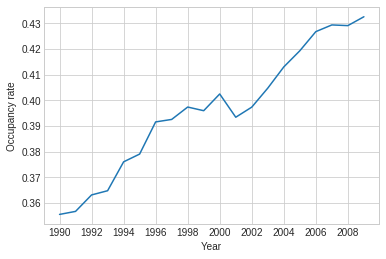

In [4]:
means = []
years = pd.date_range(start='1990', end='2009', freq='YS')

for year in years:
  year_flights = flights[flights['date'].between(year, year+datetime.timedelta(days=365))]
  mean = year_flights['people'].sum()/(year_flights['seats']+year_flights['people']).sum()
  means.append(float(mean))

ax = plt.axes()

ax.plot(years,means)
plt.ylabel("Occupancy rate")
plt.xlabel("Year")

## Million of passengers by month

Text(0.4, 0.95, '9/11 attacks')

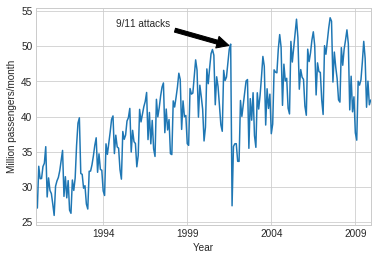

In [0]:
axe1 = flights.groupby("date")['people'].sum().div(1e6).plot()

plt.ylabel("Million passengers/month")
plt.xlabel("Year")

nine_eleven = datetime.date(2001, 9, 11)
axe1.annotate('9/11 attacks',
            xy=(nine_eleven, 50), xycoords='data',
            xytext=(0.4, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

## Mapping the top 100 airports

[None, None, None, None, None, None]

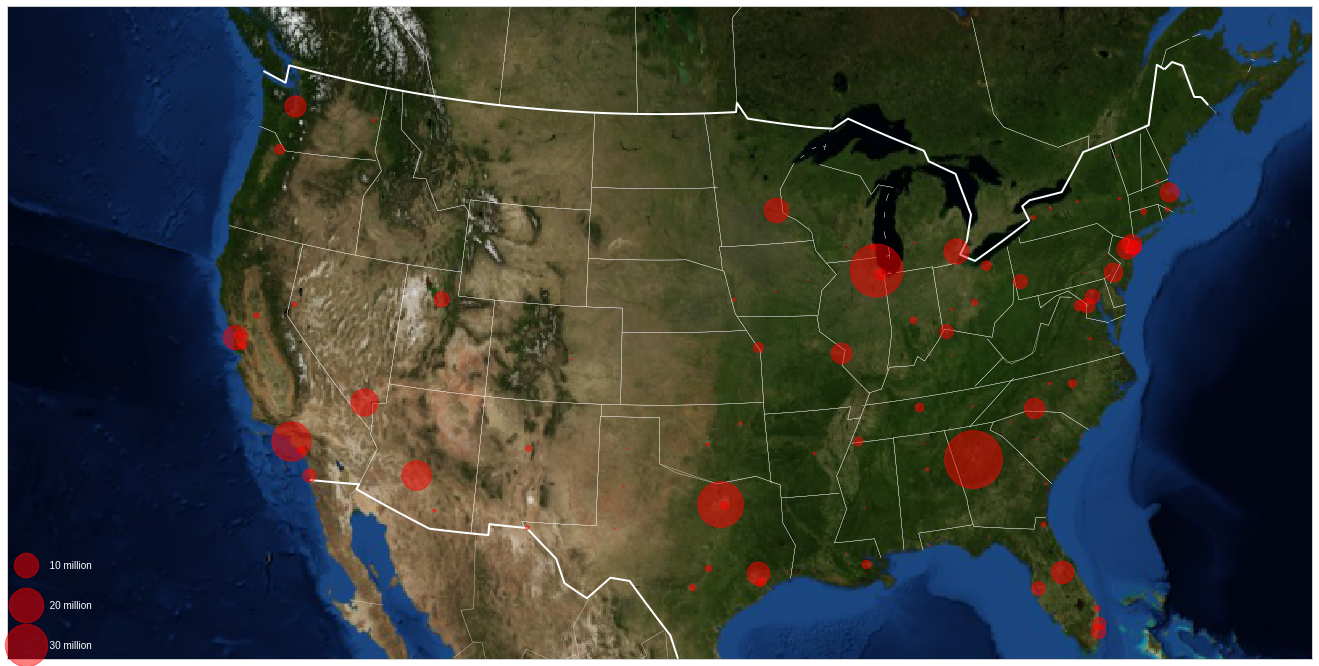

In [137]:
if 'mpl_toolkits' not in sys.modules or "Basemap" not in dir(): # Install MPL if not present
  !apt-get install libgeos-3.5.0
  !apt-get install libgeos-dev
  !pip install https://github.com/matplotlib/basemap/archive/master.zip
  !pip install pyproj==1.9.6
  from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(24, 12)) # Create Map
basemap = Basemap(projection='lcc', resolution="c", width=6E6, height=3E6, lat_0=40, lon_0=-100)
basemap.bluemarble(scale=1)
basemap.drawcountries(color='w', linewidth=2)
basemap.drawstates(color='w', linewidth=0.3)

# Select top Airports
top_airports = flights.groupby('origin')['people'].sum().sort_values(ascending=False).div(1e6).div(10).head(100)

for airport, people in top_airports.items(): # Plot every top airport
  coordinates = airports[airports['iata_code'] == airport].coordinates.values[0].split(', ')
  x, y = basemap(*coordinates)
  plt.plot(x, y, 'or', markersize=people, alpha=0.5)
  
for a in [10, 20, 30]: # Scatter point legend
    plt.scatter([], [], c='r', alpha=0.5, s=a*60, label= "  "+str(a) + ' million')
legend = plt.legend(scatterpoints=1, frameon=False, labelspacing=3, loc='lower left')
plt.setp(legend.get_texts(), color='w')

# Data Prediction


## FFT Time Series prediction

In [58]:
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm =  50                    # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = np.fft.fft(x_notrend)  # detrended x in frequency domain
    f = np.fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    list(indexes).sort(key = lambda i: np.absolute(f[i]))
    
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    forecast = restored_sig + p[0] * t
    #forecast[:-n_predict]=0
    return forecast
  


<Figure size 1040x400 with 0 Axes>

<Figure size 1040x400 with 0 Axes>

## Interactive prediction

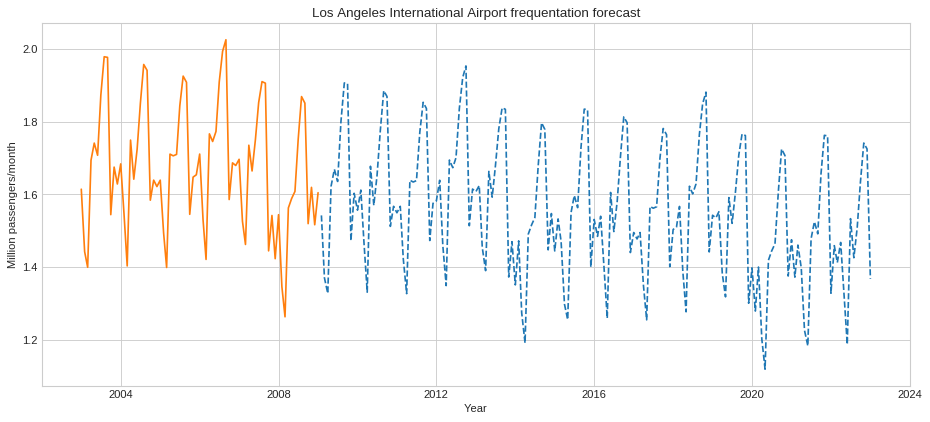

In [157]:
#@title Predict Airport Traffic { run: "auto" }
n_predict = 168 #@param {type:"slider", min:10, max:500, step:1} 
airport = "LAX" #@param {type:"string"}
n_input = 73 
figure(num=None, figsize=(14, 6), dpi=80)

months = pd.date_range(start='2003', end='2100', freq='MS')
frequentation = flights[flights['origin']==airport].groupby("date")['people'].sum().div(1e6).to_numpy()[-n_input:]
prediction = fourierExtrapolation(frequentation,n_predict)
name = airports[airports["iata_code"]==airport].name.values[0]
plt.plot(months[n_input:n_input+n_predict],prediction[n_input:],"--")
plt.plot(months[:n_input],frequentation)
plt.ylabel("Million passengers/month")
plt.xlabel("Year")
plt.title(name+" frequentation forecast")
plt.show()